In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
import matplotlib.image as mpimg
import pandas as pd
%matplotlib inline


In [2]:
## Load CIFAR10 Dataset
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(-1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify = y_train)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

Using TensorFlow backend.


(35000, 32, 32, 3)
(10000, 32, 32, 3)
(15000, 32, 32, 3)


In [3]:
### Retrieve classes count and first image example of every class
train_labels_series = pd.Series(y_train)
n_classes = train_labels_series.unique().size
y_train_list = y_train.tolist()
examples = range(n_classes)
examples = [y_train_list.index(index) for index in examples]
X_examples = [X_train[train_index] for train_index in examples]

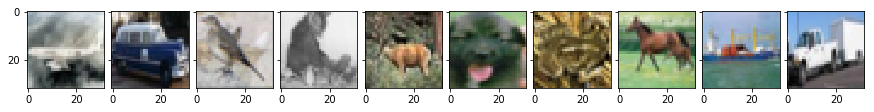

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import math
from mpl_toolkits.axes_grid1 import ImageGrid
# Visualizations will be shown in the notebook.
%matplotlib inline

### Show image of every class in a figure and use AxesGrid toolkit to display the images in a grid.
def visualize_images_data(X_examples):
    n_cols = 0
    if len(X_examples) > 10:
        n_cols = 11
    else:
        n_cols = len(X_examples)
    width = math.ceil(n_cols * 1.5)
    n_rows = math.ceil(len(X_examples) / n_cols)
    # Figure to display grid of images
    fig1 = plt.figure(figsize=(width, width * math.ceil(len(X_examples)/n_cols)))
    # AXES_GRID1 object to display the images grid.
    grid = ImageGrid(fig1, 111, nrows_ncols=(n_rows, n_cols), axes_pad=0.1)

    for index, image in enumerate(X_examples):
        grid[index].imshow(image)
    plt.show()
    
visualize_images_data(X_examples)

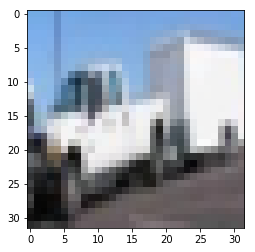

In [5]:
image = X_examples[-1]
plt.imshow(image)

In [6]:
def transform_image(img, rotation_range = 20, shear_range = 20, translation_range = 5, brightness = True):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation
    
    '''    
    img = rotate_image(img, rotation_range)
    img = shear_translate_image(img, shear_range)
    img = translate_image(img, translation_range)
    if (brightness):
        img = augument_brightness_image(img)
    return img

def augument_brightness_image(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    rand_brightness = (np.random.uniform() * .9) + 0.05
    image_hsv[:,:,2] = image_hsv[:, :, 2]*rand_brightness
    return cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)

def rotate_image(image, rotation_range = 20):
    # Rotation
    img_shape = image.shape
    angle_rot = np.random.uniform(rotation_range) - (rotation_range/2)
    rotation_M = cv2.getRotationMatrix2D((img_shape[1]/2, img_shape[0]/2), angle_rot, 1)
    img_rotate = cv2.warpAffine(image,rotation_M,(img_shape[1], img_shape[0]))
    return img_rotate

def shear_translate_image(image, shear_range = 20):
    # Shear Transformation
    img_shape = image.shape
    source_shear_pts = np.float32([[20,20], [40,20], [20, 40]])
    shear_pt1= 20 + np.random.uniform() * shear_range - (shear_range/2)
    shear_pt2 = 40 + np.random.uniform() * shear_range - (shear_range/4)
    dest_shear_pts = np.float32([[shear_pt1, 20], [shear_pt2, shear_pt1], [shear_pt1, 40]])
    
    shear_M = cv2.getAffineTransform(source_shear_pts, dest_shear_pts)
    img_shear = cv2.warpAffine(image,shear_M,(img_shape[1], img_shape[0]))
    return img_shear
    
def translate_image(image, translation_range = 5):
    # Translation
    img_shape = image.shape
    tr_x = translation_range*np.random.uniform()-translation_range/2
    tr_y = translation_range*np.random.uniform()-translation_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    img_translate = cv2.warpAffine(image,Trans_M,(img_shape[1], img_shape[0]))
    return img_translate
    
    

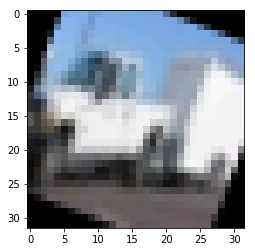

In [7]:
img_rotate = rotate_image(image, rotation_range = 90)
plt.imshow(img_rotate)

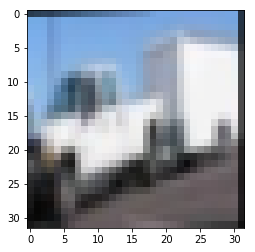

In [8]:
img_shear = shear_translate_image(image)
plt.imshow(img_shear)

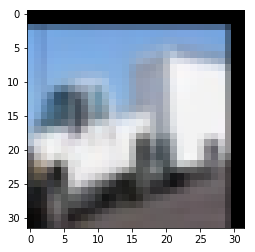

In [9]:
trans_img = translate_image(image)
plt.imshow(trans_img)

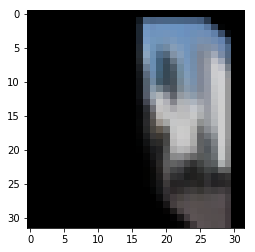

In [10]:
transform_img = transform_image(image)
plt.imshow(transform_img)

In [11]:
## Explore Keras image generator

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

x = img_to_array(image)
x = x.reshape((1,) + x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='tmpDatasetsPreview', save_prefix='truck', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

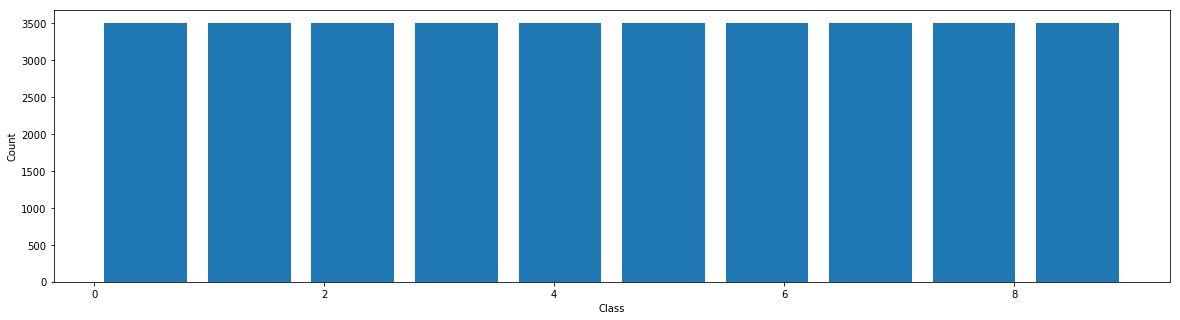

In [12]:
def plt_hist_data():
    ## Histogram of counts of each class
    plt.figure(figsize=(20, 5))
    bins = n_classes
    plt.hist(y_train, n_classes, histtype='bar', rwidth=0.8)
    plt.xlabel('Class')
    plt.ylabel('Count')
    
plt_hist_data()